In [1]:
import pandas as pd

In [68]:
df = pd.read_csv('/Users/03000070/Downloads/gapminder (1).csv')

In [5]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [9]:
df1 = df.copy()

In [11]:
df1 = df1.drop(['Region'],1)

In [12]:
df1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [14]:
X = df1.drop(['life'],1)
y = df1['life']

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knn = KNeighborsRegressor()

In [21]:
from sklearn.metrics import r2_score

In [18]:
from sklearn.model_selection import train_test_split as tts

In [32]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 0)

In [33]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [34]:
y_pred = knn.predict(X_test)

In [35]:
r2_score(y_test,y_pred)

-0.4702244260774566

In [36]:
X.shape

(139, 8)

In [37]:
# using linear regression

from sklearn.linear_model import LinearRegression

In [38]:
lin_reg = LinearRegression()

In [39]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_pred = lin_reg.predict(X_test)

In [41]:
r2_score(y_test,y_pred)

0.8171019811630393

In [42]:
#to get the corelation within each datasets

df1.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


In [44]:
# Actually getting out the features/ features selection using filter methods by checking the corelation with life first and 
#later more reducing by comparin the feature with each other, below is the filtered features

features = ['HIV','GDP','child_mortality']

In [45]:
X = df1[features]

In [46]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 0)

In [47]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_pred = lin_reg.predict(X_test)

In [49]:
r2_score(y_test,y_pred)

0.8096972496954526

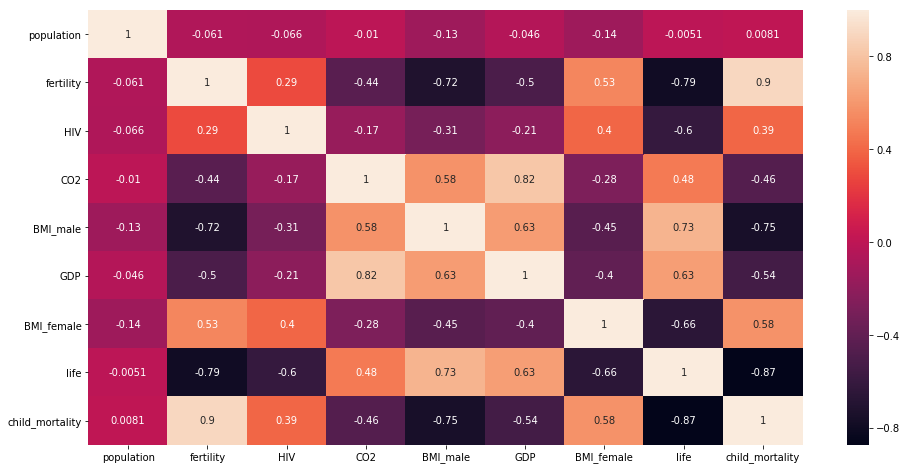

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(),annot=True)

In [54]:
# doing same for child mortality (filtering method)
# fertility,HIV,CO2,BMI_male,GDI,BMI_female,life

cm_features = ['fertility','GDP']

In [56]:
df2=df.copy()

In [59]:
df2['Region'].value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

In [61]:
#6 categories, one hot encoding using pandas

df2['Region'] = df2['Region'].str.lower()

In [66]:

df2 = pd.get_dummies(df2)

In [67]:
df2

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_america,Region_east asia & pacific,Region_europe & central asia,Region_middle east & north africa,Region_south asia,Region_sub-saharan africa
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,0,0,1,0,0,0
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,0,0,1,0,0,0
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,1,0,0,0,0,0
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,0,0,0,0,1,0
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,1,0,0,0,0,0


In [69]:
df3 = df.copy()

In [70]:
from sklearn import preprocessing

In [71]:
le = preprocessing.LabelEncoder()

In [72]:
df3['Region'] = le.fit_transform(df3['Region'])

In [73]:
df3.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1


In [74]:
df3['Region'].value_counts()

2    41
5    40
0    27
1    14
3    10
4     7
Name: Region, dtype: int64

In [75]:
df['Region'].value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import train_test_split as tts

X = df3.drop(["Region"],1)
y = df3["Region"] 

X_train,X_test,y_train,y_test = tts(X,y, test_size = 0.25, random_state = 42)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print (accuracy_score(y_test,y_pred))

0.2571428571428571


In [77]:
# startup dataset to determine profit

df4 = pd.read_csv('/Users/03000070/Downloads/50_Startups.csv')

In [78]:
df4.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [79]:
from sklearn import preprocessing

In [80]:
df4['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [81]:
le = preprocessing.LabelEncoder()

In [82]:
df4['State'] = le.fit_transform(df4['State'])

In [83]:
df4.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [84]:
df4['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [98]:
#droping state as its categorical and cant normalize categorical
X = df4.drop(['Profit','State'],1)
y = df4['Profit']

In [99]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

In [100]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [96]:
y_pred = lin_reg.predict(X_test)

In [101]:
r2_score(y_test,y_pred)

0.9418819530700165